In [1]:
# from faker import Faker
# from faker.factory import Factory
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Polygon

In [2]:
Faker = Factory.create
fake = Faker('en_US')
fake.seed(0)

In [4]:
company_list = []
loc_list = []

for _ in range(10000):
    company_list.append(fake.company() + ' ' + fake.company_suffix())
    loc_list.append(fake.address())


key_values =['company_name','address']
demo_dict = dict(zip(key_values, [company_list,loc_list]))
company_df = pd.DataFrame(demo_dict)
company_df.to_clipboard()

In [5]:
company_df = pd.read_csv('fake_company_data.csv')

,company_name,address
0,George LLC Group,"34057 Shaw Fork\nNorth Gabrielhaven, ND 10845"
1,"Burke, Scott and Brown PLC","505 Michelle Loaf Apt. 254\nBryantchester, NH ..."
2,"Arias, Rodriguez and Moran PLC","93672 Murray Islands Suite 323\nJosephborough,..."
3,Larsen-Morgan and Sons,Unit 5914 Box 3225\nDPO AP 85675
4,Johnson-Summers and Sons,"70016 Johnson Roads\nSouth Jeremy, LA 67623"
...,...,...
9995,"Perez, Gaines and Smith LLC",Unit 1903 Box 3671\nDPO AE 74657
9996,"White, Chang and Barrera Ltd","1633 Joseph Brooks Suite 765\nNorth Karla, VA ..."
9997,Jones Inc and Sons,"21683 Daniel Mountains Suite 614\nLake Hannah,..."
9998,Clark PLC Group,Unit 9950 Box 3442\nDPO AE 91939


In [6]:
split_address = company_df['address'].str.split(regex=True, pat='^([^,]+),\s([A-Z]{2})(?:\s(\d{5}))?$',expand=True)
columns_list = ['po_box','street','state','zip','unknown']
split_address.columns = columns_list
company_df = company_df.join(split_address)

company_df = company_df[~company_df['state'].isna()].drop(columns=['po_box','unknown']).copy()

state_abbreviations = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
}

df = company_df[company_df["state"].isin(state_abbreviations.values())].copy()


In [5]:
df

,company_name,address,street,state,zip
3,"Summers, Barnett and Smith Group","51393 Linda Divide Suite 115\nRodriguezside, L...",51393 Linda Divide Suite 115\nRodriguezside,LA,93111
6,"Vega, Massey and Warren PLC","969 Hayes Shore\nChristopherville, NM 77450",969 Hayes Shore\nChristopherville,NM,77450
7,"Rogers, Lee and Smith LLC","2560 Krista Walk\nNorth Lisa, SC 70519",2560 Krista Walk\nNorth Lisa,SC,70519
8,"Becker, Johnson and Reid PLC","1510 James Ferry\nSouth Jasonton, TX 03487",1510 James Ferry\nSouth Jasonton,TX,03487
9,"Coleman, Garcia and Green and Sons","6208 Williams Courts Suite 345\nMasseyshire, G...",6208 Williams Courts Suite 345\nMasseyshire,GA,91949
...,...,...,...,...,...
9994,Flores Ltd LLC,"240 Smith Crossing\nJamesbury, SC 32827",240 Smith Crossing\nJamesbury,SC,32827
9995,Hernandez Ltd Inc,"997 Jones Manors Suite 933\nWest Ronaldstad, M...",997 Jones Manors Suite 933\nWest Ronaldstad,MO,31876
9996,"Banks, Mendez and Jones LLC","7657 Smith Inlet\nClaytontown, MO 45262",7657 Smith Inlet\nClaytontown,MO,45262
9997,"Gallagher, Jenkins and Perry Ltd","245 Jill Forge Suite 908\nHurleybury, NY 59725",245 Jill Forge Suite 908\nHurleybury,NY,59725


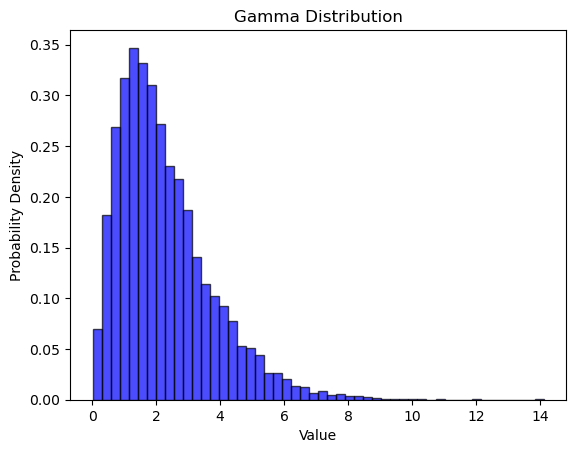

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for consistent distribution results
np.random.seed(42)

# Set the shape parameter
k = 2.25

# Set the size of the sample
n = len(df)

# Generate a gamma distribution
gamma_distribution = np.random.gamma(k, size=n)

# Plot the histogram
plt.hist(gamma_distribution, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Gamma Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

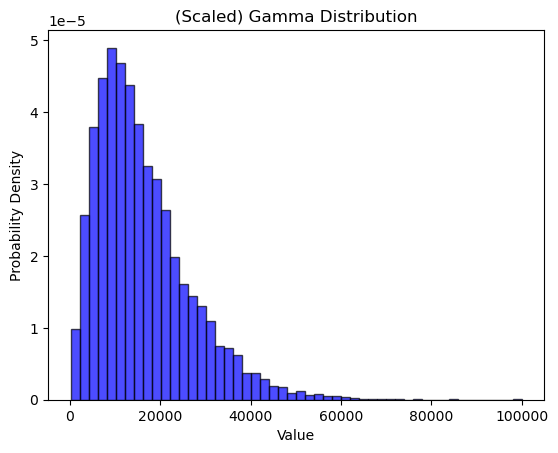

In [7]:
#scale distribution to mimic different participants at companies
min_value = 50
max_value = 100000
scaled_gamma_distribution = min_value + (max_value - min_value) * (gamma_distribution / np.max(gamma_distribution))

plt.hist(scaled_gamma_distribution, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('(Scaled) Gamma Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

df['scaled_gamma_distribution'] = scaled_gamma_distribution

In [8]:
df

,company_name,address,street,state,zip,scaled_gamma_distribution
3,"Summers, Barnett and Smith Group","51393 Linda Divide Suite 115\nRodriguezside, L...",51393 Linda Divide Suite 115\nRodriguezside,LA,93111,19104.058988
6,"Vega, Massey and Warren PLC","969 Hayes Shore\nChristopherville, NM 77450",969 Hayes Shore\nChristopherville,NM,77450,12315.731202
7,"Rogers, Lee and Smith LLC","2560 Krista Walk\nNorth Lisa, SC 70519",2560 Krista Walk\nNorth Lisa,SC,70519,11457.745931
8,"Becker, Johnson and Reid PLC","1510 James Ferry\nSouth Jasonton, TX 03487",1510 James Ferry\nSouth Jasonton,TX,03487,11457.889296
9,"Coleman, Garcia and Green and Sons","6208 Williams Courts Suite 345\nMasseyshire, G...",6208 Williams Courts Suite 345\nMasseyshire,GA,91949,35749.254984
...,...,...,...,...,...,...
9994,Flores Ltd LLC,"240 Smith Crossing\nJamesbury, SC 32827",240 Smith Crossing\nJamesbury,SC,32827,16303.102273
9995,Hernandez Ltd Inc,"997 Jones Manors Suite 933\nWest Ronaldstad, M...",997 Jones Manors Suite 933\nWest Ronaldstad,MO,31876,14761.880794
9996,"Banks, Mendez and Jones LLC","7657 Smith Inlet\nClaytontown, MO 45262",7657 Smith Inlet\nClaytontown,MO,45262,14090.004414
9997,"Gallagher, Jenkins and Perry Ltd","245 Jill Forge Suite 908\nHurleybury, NY 59725",245 Jill Forge Suite 908\nHurleybury,NY,59725,6843.098378


In [9]:
state_gdp_dict = {
    'CA': 3.5 * 10**12,
    'TX': 2.1 * 10**12,
    'NY': 1.9 * 10**12,
    'FL': 1.3 * 10**12,
    'IL': 973.5 * 10**9,
    'PA': 874.9 * 10**9,
    'OH': 765 * 10**9,
    'GA': 713.9 * 10**9,
    'NJ': 700.1 * 10**9,
    'WA': 696.7 * 10**9,
    'NC': 684.6 * 10**9,
    'MA': 663.8 * 10**9,
    'VA': 614.8 * 10**9,
    'MI': 592.3 * 10**9,
    'MD': 452 * 10**9,
    'CO': 440.9 * 10**9,
    'TN': 439.1 * 10**9,
    'IN': 438 * 10**9,
    'AZ': 429.8 * 10**9,
    'MN': 429.4 * 10**9,
    'WI': 379.9 * 10**9,
    'MO': 373.1 * 10**9,
    'CT': 308.7 * 10**9,
    'SC': 281.8 * 10**9,
    'OR': 279.4 * 10**9,
    'LA': 267.1 * 10**9,
    'AL': 257.5 * 10**9,
    'KY': 244.5 * 10**9,
    'UT': 230.3 * 10**9,
    'IA': 225.7 * 10**9,
    'OK': 218.6 * 10**9,
    'NV': 204.3 * 10**9,
    'KS': 198.3 * 10**9,
    'DC': 156.5 * 10**9,
    'NE': 154.1 * 10**9,
    'AR': 150.5 * 10**9,
    'MS': 130 * 10**9,
    'NM': 114.7 * 10**9,
    'NH': 102.4 * 10**9,
    'ID': 98.5 * 10**9,
    'HI' : 94.9 * 10**9,
    'WV': 92 * 10**9,
    'DE': 84.2 * 10**9,
    'ME': 79.2 * 10**9,
    'RI': 68.8 * 10**9,
    'ND': 66.4 * 10**9,
    'SD': 62.8 * 10**9,
    'MT': 62 * 10**9,
    'AK': 58 * 10**9,
    'WY': 44.3 * 10**9,
    'VT': 37.6 * 10**9
}
list(state_gdp_dict.items())[0:10]

[('CA', 3500000000000.0),
 ('TX', 2100000000000.0),
 ('NY', 1900000000000.0),
 ('FL', 1300000000000.0),
 ('IL', 973500000000.0),
 ('PA', 874900000000.0),
 ('OH', 765000000000),
 ('GA', 713900000000.0),
 ('NJ', 700100000000.0),
 ('WA', 696700000000.0)]

In [10]:
gdp_array = np.array(list(state_gdp_dict.values()))
min_value = np.min(gdp_array)
max_value = np.max(gdp_array)

## 1 + ((gdp_array - min_value) / (max_value - min_value))
scaled_gdp_values = {state: (1 + (gdp - min_value) / (max_value - min_value)) for state, gdp in state_gdp_dict.items()}
list(scaled_gdp_values.items())[0:10]

[('CA', 2.0),
 ('TX', 1.595656192236599),
 ('NY', 1.5378927911275415),
 ('FL', 1.3646025878003698),
 ('IL', 1.2703038354898337),
 ('PA', 1.2418264787430684),
 ('OH', 1.2100854898336415),
 ('GA', 1.1953269408502774),
 ('NJ', 1.1913412661737524),
 ('WA', 1.1903592883548983)]

In [11]:
df['scaled_gdp_values'] = df['state'].map(scaled_gdp_values)
df['participants'] = round(df['scaled_gdp_values'] * df['scaled_gamma_distribution'])
df['participants'].describe()

count      7630.000000
mean      18112.348493
std       12189.984416
min         246.000000
25%        9354.750000
50%       15366.000000
75%       24012.000000
max      159566.000000
Name: participants, dtype: float64

<Axes: >

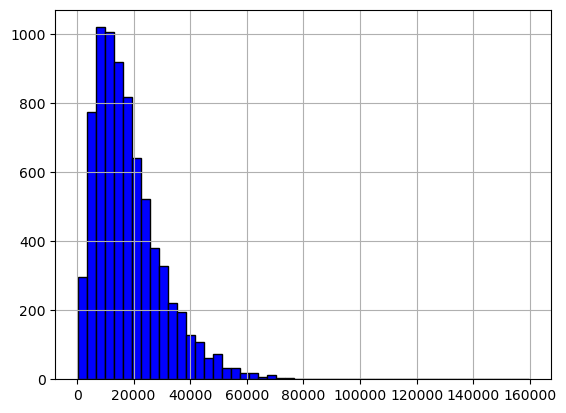

In [12]:
df['participants'].hist(bins=50, color='blue', edgecolor='black')

In [56]:
##remove for final report
df['market_segment'] = np.where((df['participants'] < 10000), 'core',
         np.where((df['participants'] >= 10000) & (df['participants'] < 20000), 'mid',
                  np.where(df['participants'] >= 20000,'upper',None)))
df.head()

,company_name,address,street,state,zip,scaled_gamma_distribution,scaled_gdp_values,participants,market_segment
3,"Summers, Barnett and Smith Group","51393 Linda Divide Suite 115\nRodriguezside, L...",51393 Linda Divide Suite 115\nRodriguezside,LA,93111,19104.058988,1.066284,20370.0,upper
6,"Vega, Massey and Warren PLC","969 Hayes Shore\nChristopherville, NM 77450",969 Hayes Shore\nChristopherville,NM,77450,12315.731202,1.022268,12590.0,mid
7,"Rogers, Lee and Smith LLC","2560 Krista Walk\nNorth Lisa, SC 70519",2560 Krista Walk\nNorth Lisa,SC,70519,11457.745931,1.070529,12266.0,mid
8,"Becker, Johnson and Reid PLC","1510 James Ferry\nSouth Jasonton, TX 03487",1510 James Ferry\nSouth Jasonton,TX,03487,11457.889296,1.595656,18283.0,mid
9,"Coleman, Garcia and Green and Sons","6208 Williams Courts Suite 345\nMasseyshire, G...",6208 Williams Courts Suite 345\nMasseyshire,GA,91949,35749.254984,1.195327,42732.0,upper


Text(0, 0.5, 'Total Participants')

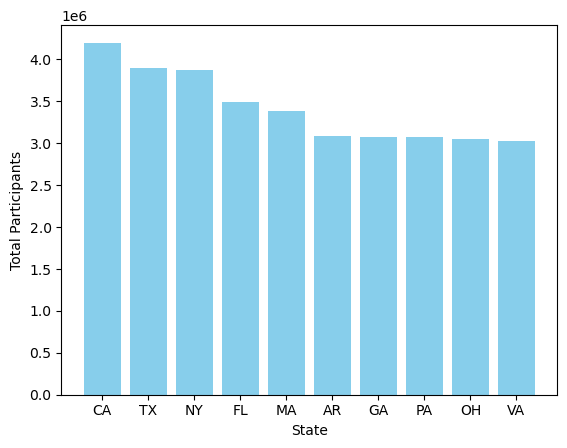

In [52]:
states_df = df[['state','scaled_gamma_distribution','participants']].groupby('state').sum().sort_values('participants',ascending=False)

##look at top 10 States by Total Participants
top_states = states_df.head(10)
plt.bar(top_states.index, top_states['participants'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Participants')

In [45]:
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

In [7]:
# import the United States shape file
gdf = gpd.read_file('cb_2018_us_state_500k')
gdf = gdf.merge(states_df, left_on='STUSPS',right_on='state')

def plot_us_map(gdf,column):
# set state code as index, exclude states that we will never display
    gdf = gdf.set_index('STUSPS')

    # create an axis with 2 insets − this defines the inset sizes
    fig, continental_ax = plt.subplots(figsize=(20, 10))
    alaska_ax = continental_ax.inset_axes([.08, .01, .20, .28])
    hawaii_ax = continental_ax.inset_axes([.28, .01, .15, .19])

    # Set bounds to fit desired areas in each plotg
    continental_ax.set_xlim(-130, -64)
    continental_ax.set_ylim(22, 53)

    alaska_ax.set_ylim(51, 72)
    alaska_ax.set_xlim(-180, -127)

    hawaii_ax.set_ylim(18.8, 22.5)
    hawaii_ax.set_xlim(-160, -154.6)

    # Plot the data per area - requires passing the same choropleth parameters to each call
    # because different data is used in each call, so automatically setting bounds won’t work
    vmin, vmax = gdf[column].agg(['min', 'max'])
    gdf.drop(index=['HI', 'AK']).plot(column=column, ax=continental_ax, vmin=vmin, vmax=vmax)
    gdf.loc[['AK']].plot(column=column, ax=alaska_ax, vmin=vmin, vmax=vmax)
    gdf.loc[['HI']].plot(column=column, ax=hawaii_ax, vmin=vmin, vmax=vmax)

    fig = continental_ax.get_figure()
    # add colorbar axes to the figure
    # This will take some iterating to get it where you want it [l,b,w,h] right
    # l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
    cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

    cbax.set_title('Participant Distribution\n', **hfont, fontdict={'fontsize': '15', 'fontweight' : '0'})

    # add color scale
    colormap = "viridis"
    sm = plt.cm.ScalarMappable(cmap=colormap, \
                    norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # reformat tick labels on legend
    from matplotlib.ticker import FuncFormatter
    sm._A = []
    comma_fmt = FuncFormatter(lambda x, p: human_format(x))
    fig.colorbar(sm, cax=cbax, format=comma_fmt)
    tick_font_size = 16
    cbax.tick_params(labelsize=tick_font_size)

    # remove ticks
    for ax in [continental_ax, alaska_ax, hawaii_ax]:
        ax.set_yticks([])
        ax.set_xticks([])
    


plot_us_map(gdf, 'scaled_gamma_distribution')

NameError: name 'states_df' is not defined

/Users/spencerwood/miniforge3/lib/python3.10/site-packages/geopandas/plotting.py:715: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Users/spencerwood/miniforge3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/spencerwood/miniforge3/lib/python3.10/site-packages/geopandas/plotting.py:715: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Users/spencerwood/miniforge3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute i

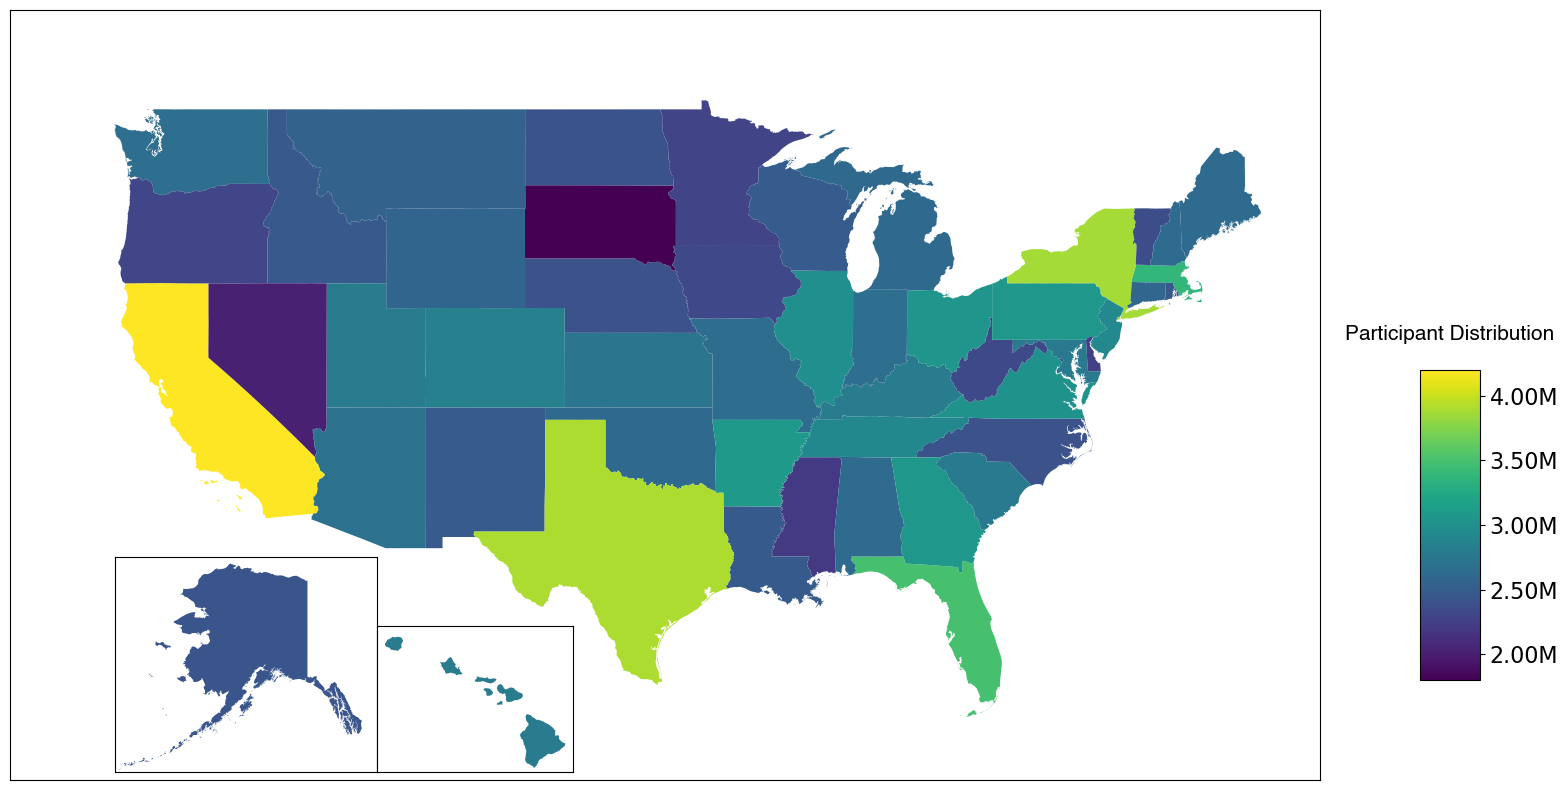

In [47]:
plot_us_map(gdf, 'participants')

In [91]:
df = df.reset_index()
agg_params = {'index':'nunique'
              ,'participants':'sum'}

df_agg = df[['index','participants', 'state','market_segment']].groupby(['state','market_segment']).agg(agg_params)
df_agg = df_agg.unstack(['market_segment'])

df_agg.columns = df_agg.columns.droplevel(level=0)

df_agg = df_agg.reset_index()

df_agg.columns = ['state','core_accounts','mid_accounts','upper_accounts','core_parts','mid_parts','upper_parts']

df_agg

,state,core_accounts,mid_accounts,upper_accounts,core_parts,mid_parts,upper_parts
0,AK,51,63,42,325016.0,920089.0,1184753.0
1,AL,40,59,48,257407.0,865728.0,1508322.0
2,AR,63,67,55,410942.0,958521.0,1717518.0
3,AZ,42,61,49,271238.0,873996.0,1560909.0
4,CA,15,31,92,101176.0,491193.0,3606220.0
5,CO,41,53,59,261989.0,802619.0,1770783.0
6,CT,44,64,45,283606.0,895936.0,1413317.0
7,DC,51,43,47,309278.0,631014.0,1395453.0
8,DE,45,53,38,270821.0,778747.0,1210184.0
9,FL,21,58,76,157328.0,883123.0,2455211.0
